In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

### Data Load

In [111]:
X_train = np.load('X_train_regression1.npy')
X_train_df = pd.DataFrame(X_train)
Y_train = np.load('y_train_regression1.npy')
Y_train_df = pd.DataFrame(Y_train)
X_test = np.load('X_test_regression1.npy')
X_test_df = pd.DataFrame(X_test)

### EDA

#### Data distribution analisys

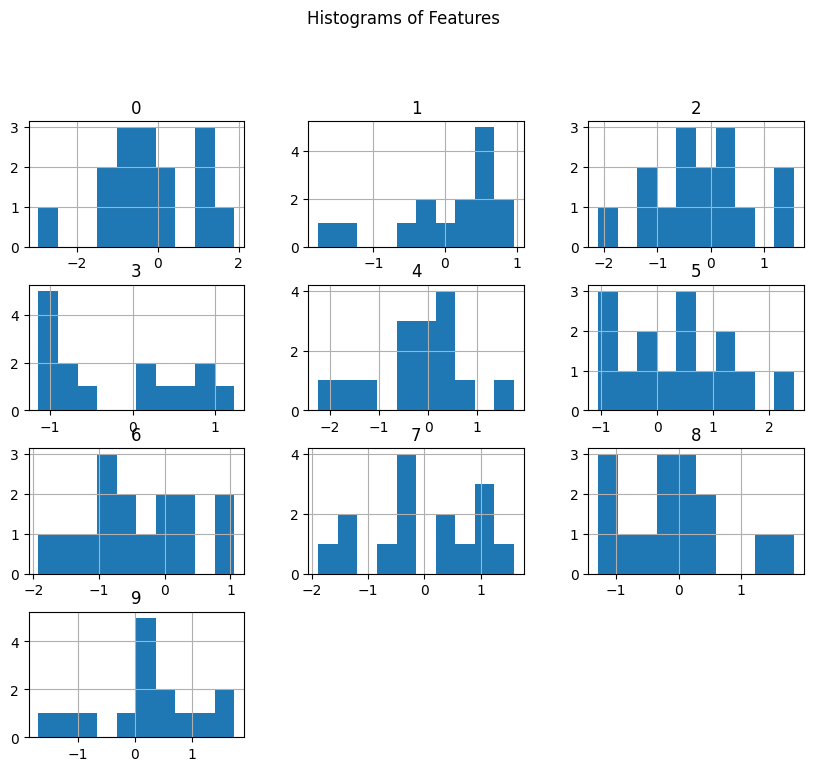

In [112]:
X_train_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

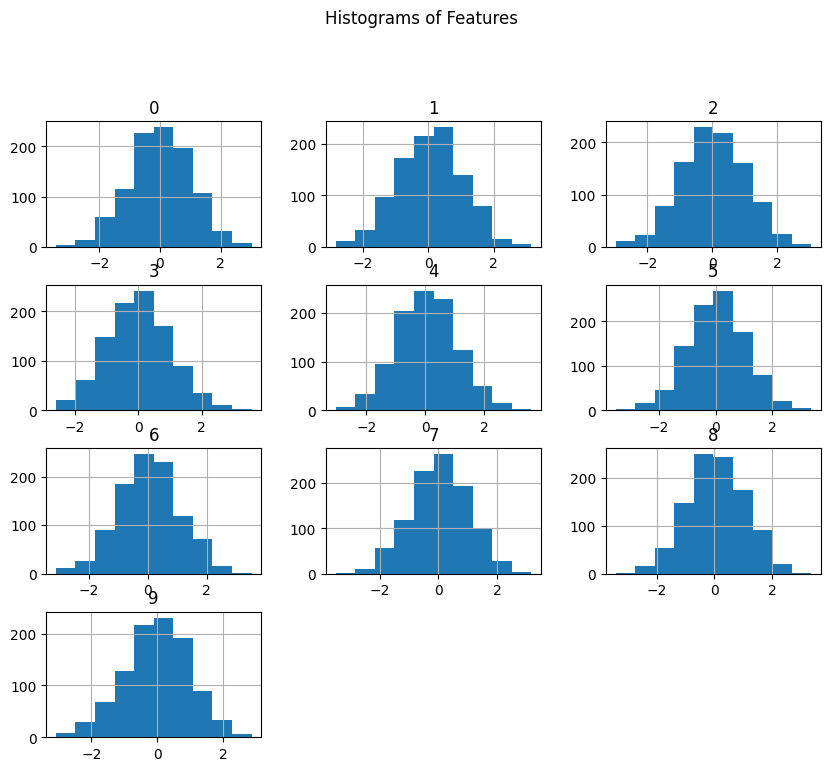

In [113]:
X_test_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

#### Data correlation analisys

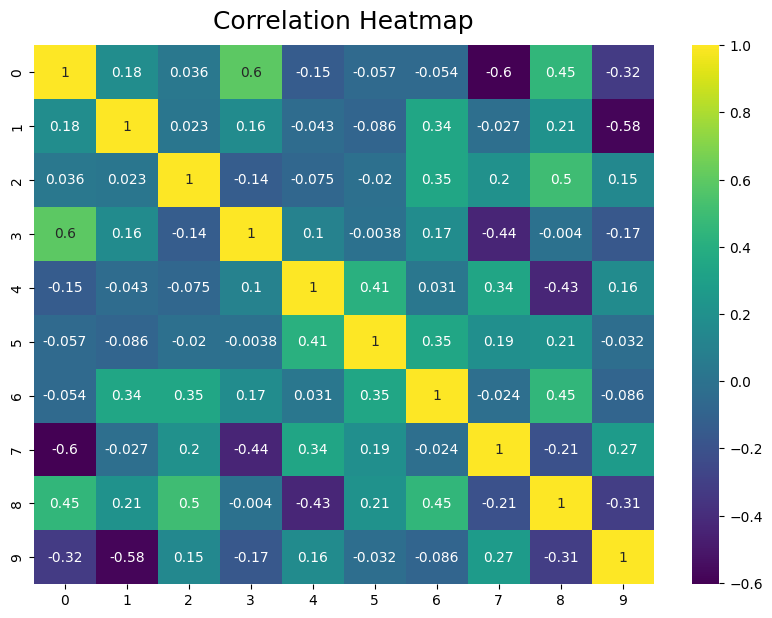

In [114]:
f = plt.figure(figsize=(10, 7))
X_train_Matrix = X_train_df.corr() 
heatmap = sns.heatmap(X_train_Matrix, annot=True, cmap="viridis") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

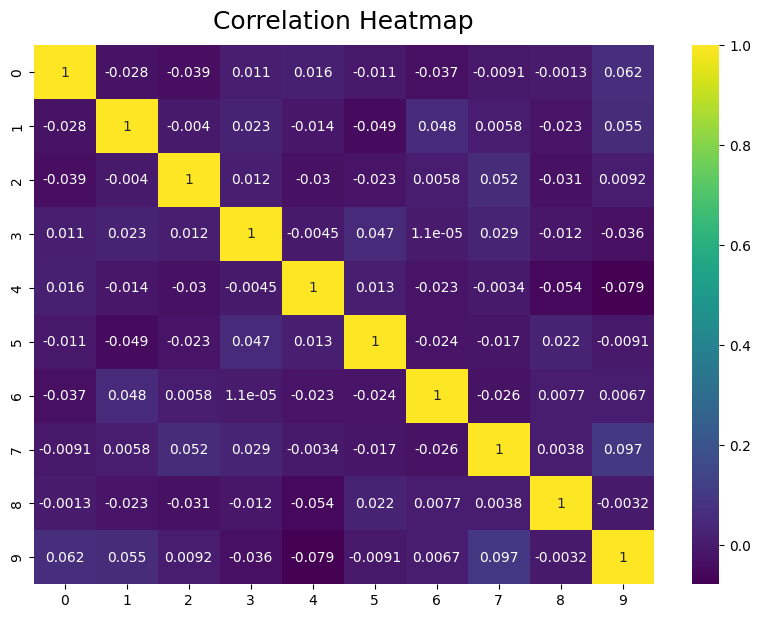

In [115]:
f = plt.figure(figsize=(10, 7))
X_test_Matrix = X_test_df.corr() 
heatmap = sns.heatmap(X_test_Matrix, annot=True, cmap="viridis") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Feature 0: 0.386178
Feature 1: 4.036347
Feature 2: 2.897527
Feature 3: 1.352134
Feature 4: 1.120926
Feature 5: 8.329494
Feature 6: 0.001137
Feature 7: 1.949557
Feature 8: 0.480275
Feature 9: 3.329743


c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


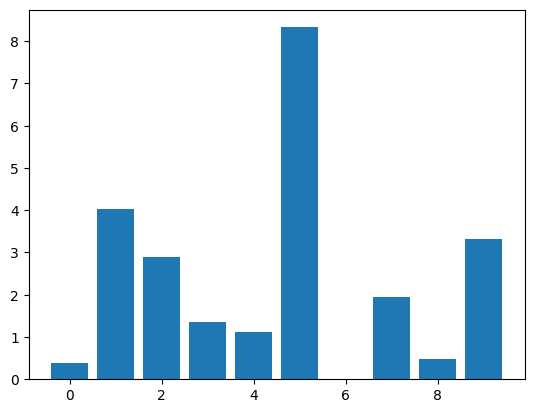

In [116]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_df, Y_train_df, X_test_df)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Preprocessing

#### Scaling

In [117]:
# standard_scaler = StandardScaler()
# X_train_df = pd.DataFrame(standard_scaler.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(standard_scaler.transform(X_test_df))

In [118]:
minmax_scaler = MinMaxScaler()
X_train_df = pd.DataFrame(minmax_scaler.fit_transform(X_train_df))
X_test_df = pd.DataFrame(minmax_scaler.transform(X_test_df))

#### Feature Selection

Test dropping different dropped

In [119]:
features_to_drop =[] 
X_train_df = X_train_df.drop(columns=features_to_drop)
X_test_df = X_test_df.drop(columns=features_to_drop)
X_train_df

,0,1,2,3,4,5,6,7,8,9
0,0.812206,0.796322,0.473683,0.508716,0.403342,0.000000,0.000000,0.698791,0.424270,0.167765
1,0.554290,0.884520,0.645247,0.018666,0.210542,0.627787,1.000000,0.332107,1.000000,0.000000
2,0.495716,0.587246,0.796259,0.029380,0.465852,0.092365,0.511916,0.873422,0.582151,0.995654
3,0.589370,0.944318,0.482417,0.572688,1.000000,0.334913,0.612845,0.491319,0.010232,0.522368
4,0.323304,0.796819,0.215579,0.154764,0.530507,0.412205,0.349921,0.864566,0.000000,0.403670
5,0.458429,0.175437,0.000000,0.130166,0.602424,0.437405,0.347958,0.435259,0.066700,1.000000
6,1.000000,1.000000,0.658771,0.887608,0.749624,1.000000,0.902705,0.637271,0.834387,0.532438
7,0.000000,0.886162,0.360062,0.081533,0.548950,0.639198,0.498872,1.000000,0.144408,0.689802
8,0.812325,0.497114,0.437812,0.869731,0.619349,0.492010,0.270911,0.124108,0.229001,0.540459
9,0.362439,0.000000,0.998737,0.000000,0.680705,0.744485,0.360367,0.838913,0.432804,0.896321


#### PCA
Test different number of components

In [120]:
# pca_components = 10 
# pca = PCA(n_components=pca_components)

# X_train_df = pd.DataFrame(pca.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(pca.transform(X_test_df))

# explained_variance_ratio = pca.explained_variance_ratio_

# for i, ratio in enumerate(explained_variance_ratio):
#     print(f"Explained Variance Ratio (Component {i + 1}): {ratio:.4f}")

# X_train_df

### Training

#### Lasso

In [121]:
alphas = [0,0.001, 0.01, 0.1, 1.0, 10.0]

lasso_cv = LassoCV(alphas=alphas, cv=None)
lasso_cv.fit(X_train_df, Y_train)

best_alpha = lasso_cv.alpha_
print(best_alpha)

model = Lasso(alpha=best_alpha)
model.fit(X_train_df, Y_train)

0.01


c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0833898897088936, tolerance: 0.006731599188269995
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Maria_Lia

Lasso(alpha=0.01)

#### Ridge

In [122]:
# alphas = [ 0.001, 0.01, 0.1, 1.0, 10.0]

# ridge_results = {}

# for alpha in alphas:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(X_train_df, Y_train)
    
#     pred = ridge.predict(X_train_df)
    
#     mse = mean_squared_error(Y_train, pred)
#     r2 = r2_score(Y_train, pred)
    
#     ridge_results[alpha] = {'model': ridge, 'MSE': mse, 'R2': r2}
    
# best_alpha = min(ridge_results, key=lambda alpha: ridge_results[alpha]['MSE'])
# print(best_alpha)

# print(ridge_results)
# model = Ridge(alpha=best_alpha)
# model.fit(X_train_df, Y_train)

#### Ordinary Least Squares

In [123]:
# #LINEAR REGRESSION
# model = LinearRegression()
# model.fit(X_train_df, Y_train)
# print("Coefficients: \n", model.coef_)

### Prediction

In [124]:
train_pred = model.predict(X_train_df)
test_pred = model.predict(X_test_df)

#### Cross Validation

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [133]:
# KNN classifier model
knn = KNeighborsClassifier()

# K-fold (k=5)
scores = cross_val_score(knn,  train_pred, Y_train, cv=5, scoring='accuracy')

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[-0.32371756  0.00751066  1.3894554   3.61628875  2.12589143  1.81274706
  7.05468519 -1.11152369  0.58112825  1.47487421 -0.13306923 -0.18693654].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[-0.96701316  0.66367867  1.79286417  3.61628875  2.12589143  1.81274706
  7.05468519 -1.11152369  0.58112825  1.47487421 -0.13306923 -0.18693654].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[-0.96701316  0.66367867  1.79286417 -0.32371756  0.00751066  1.3894554
  7.05468519 -1.11152369  0.58112825  1.47487421 -0.13306923 -0.18693654].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[-0.96701316  0.66367867  1.79286417 -0.32371756  0.00751066  1.3894554
  3.61628875  2.12589143  1.81274706  1.47487421 -0.13306923 -0.18693654].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Maria_Lia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[-0.96701316  0.66367867  1.79286417 -0.32371756  0.00751066  1.3894554
  3.61628875  2.12589143  1.81274706  7.05468519 -1.11152369  0.58112825].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


### Evaluation

In [125]:
mse = mean_squared_error(Y_train, train_pred)
sse = mse * len(Y_train)

r2 = r2_score(Y_train, train_pred)

print(f"Sum of Squared Errors (SSE) Ridge Prediction: {sse:.2f}")
print(f"R-squared (R2) Score Ridge Prediction : {r2:.2f}")

train_pred_df = pd.DataFrame(train_pred)

Sum of Squared Errors (SSE) Ridge Prediction: 5.59
R-squared (R2) Score Ridge Prediction : 0.92


#### Saving Prediction

In [130]:
np.save('C:\Users\Maria_Lia\Desktop\IST\AA\Lab1\test_pred.npy')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (630570337.py, line 1)